In [4]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import PIL
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

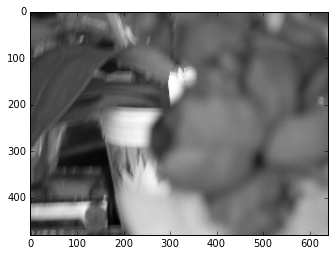

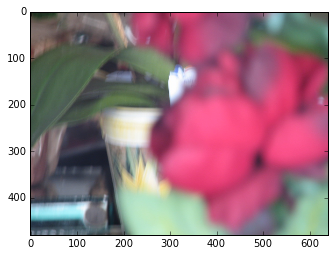

In [28]:
folder = "blur_data" 

pixel_depth = 255.0  # Number of levels per pixel.
image_files = os.listdir(folder)
image_file = os.path.join(folder, image_files[0])
image_data = mpimg.imread(image_file)
i = PIL.Image.open(image_file)

image_gray = np.array(i.convert('L'))
image_color = np.array(i.convert('RGB'))


plt.figure()
plt.imshow(image_gray,cmap = plt.get_cmap('gray'))
plt.figure()
plt.imshow(image_color)


C:\Python27\lib\site-packages\ipykernel\__main__.py:14: ComplexWarning: Casting complex values to real discards the imaginary part


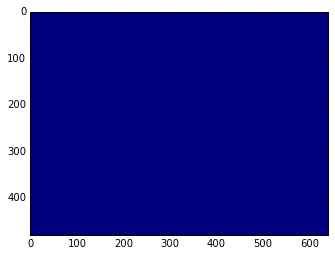

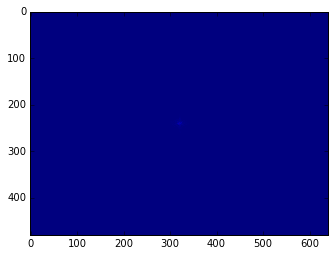

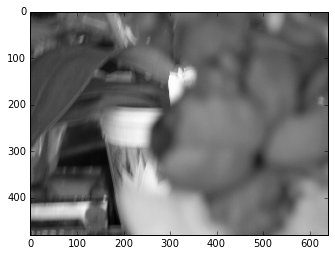

In [58]:
image_gray_fft2 = np.fft.fft2(image_gray)

image_gray_fft2_shift = np.fft.fftshift(image_gray_fft2)
image_gray_fft2_back = np.fft.ifft2(image_gray_fft2)

plt.figure()
plt.imshow(abs(image_gray_fft2))

plt.figure()
plt.imshow(abs(image_gray_fft2_shift))


plt.figure()
plt.imshow(image_gray_fft2_back.astype(np.uint8),cmap = plt.get_cmap('gray'))


C:\Python27\lib\site-packages\ipykernel\__main__.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Python27\lib\site-packages\ipykernel\__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Python27\lib\site-packages\ipykernel\__main__.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


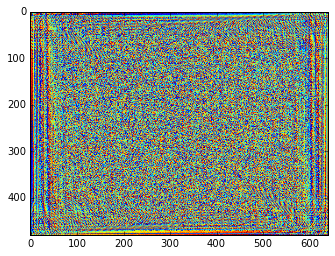

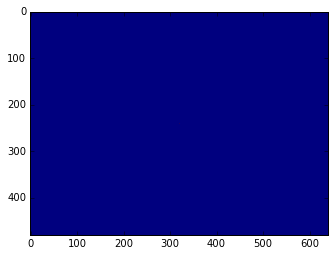

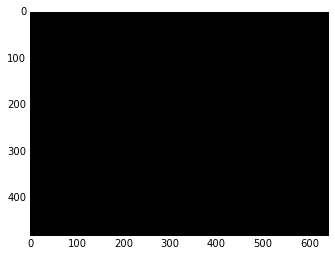

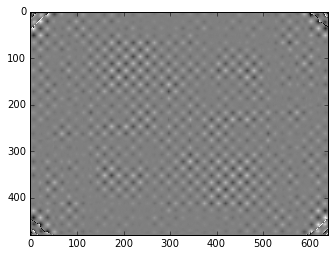

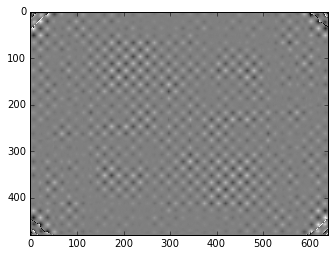

In [64]:

image_gray_fft2_phase = np.angle(image_gray_fft2)
image_gray_fft2_power_spectrum = np.abs(image_gray_fft2_shift)**2

image_gray_fft2_back_only_phase = np.fft.ifft2(image_gray_fft2_phase)
image_gray_fft2_back_only_spectrum = np.fft.ifft2(abs(image_gray_fft2_shift))
# image_gray_fft2_back_phase_spectrum = np.fft.ifft2(image_gray_fft2_phase+abs(image_gray_fft2_shift))
image_gray_fft2_back_phase_spectrum = image_gray_fft2_back_only_phase+image_gray_fft2_back_only_spectrum

plt.figure()
plt.imshow((image_gray_fft2_phase))


plt.figure()
plt.imshow(image_gray_fft2_power_spectrum)


plt.figure()
plt.imshow(image_gray_fft2_back_only_phase.astype(np.uint8),cmap = plt.get_cmap('gray'))


plt.figure()
plt.imshow(image_gray_fft2_back_only_spectrum.astype(np.uint8),cmap = plt.get_cmap('gray'))


plt.figure()
plt.imshow(image_gray_fft2_back_phase_spectrum.astype(np.uint8),cmap = plt.get_cmap('gray'))



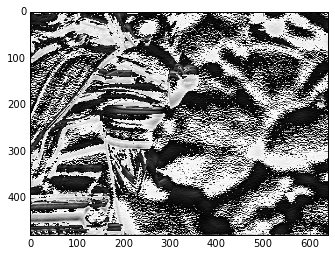

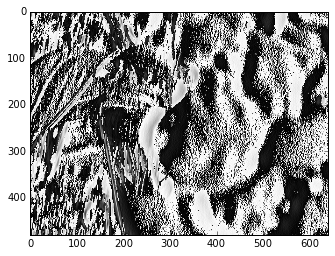

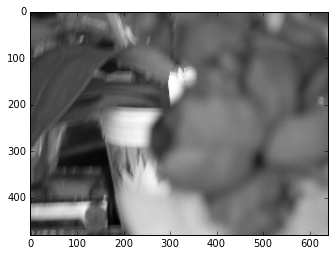

In [89]:
k = np.array([[2, 2, 2],
                    [0, 0, 0],
                    [-2, -2, -2]])

image_gray_cov = ndimage.filters.convolve(image_gray,k,mode='wrap')
plt.figure()
plt.imshow(image_gray_cov,cmap = plt.get_cmap('gray'))

image_gray_sobel = ndimage.filters.sobel(image_gray,1)
plt.figure()
plt.imshow(image_gray_sobel,cmap = plt.get_cmap('gray'))

plt.figure()
plt.imshow(image_gray,cmap = plt.get_cmap('gray'))

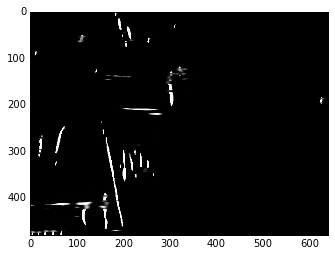

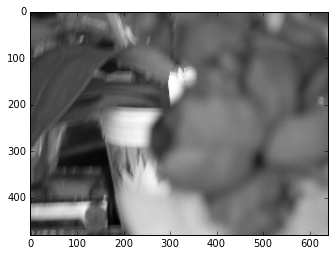

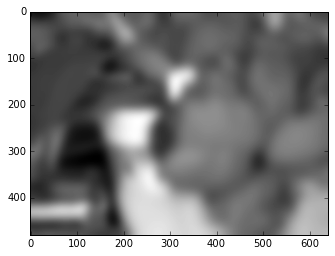

In [107]:
gaussina_laplace_image_gray =  ndimage.filters.gaussian_laplace(image_gray,3)
gaussina_filter_image_gray =  ndimage.filters.gaussian_filter(image_gray,10)

plt.figure()
plt.imshow(gaussina_laplace_image_gray,cmap = plt.get_cmap('gray'))


plt.figure()
plt.imshow(image_gray,cmap = plt.get_cmap('gray'))


plt.figure()
plt.imshow(gaussina_filter_image_gray,cmap = plt.get_cmap('gray'))
